<a href="https://colab.research.google.com/github/AdithiyaG/Langchain/blob/main/Langchain/DLAI/Langchain_chat_with_your_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
pip install --quiet langchain langchain_cohere

# Document Loaders

In [16]:
!pip install --quiet PyPDF

In [17]:
paths=["/content/BestPractice.Transfermodes.pdf","/content/Cloning a TCRA 11 environment.pdf"]

In [19]:
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader(paths[0])
pages=loader.load()

In [84]:
len(pages)
pages[1]

Document(page_content='Simple use first  \n \nBefore getting into the more interesting cases of translating data through AIWS or even \nthe AI interface I urge you to try a simple translation using the file interface.  \n \nThis can be done from an ITK shell. Run :  \n \nplmxml_export –h  \n \nfor all options.  \n \nWhen working with configured objects, Bom Lines and the like it is easier to use the \nPortal interface.  (see the portal user documentation My Navigator)  \n \n \n \n \nFrom the users’s perspective.  \nUsers don’t want to know about “changing context” and data subsets – they just want \neverything to work the way they expect.  To aid this all PLMXML translations into and \nout of TeamCenter Engineering are based on a Transfermode. A Transfermode is an \nobject that is responsible for translation intent.  A fancy way to say that the Transfermode \nis responsible for what gets processed and how.  \n \nBut from the users perspective the Transfermode is simply a name.  It is s

# Document Splitting

In [21]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [29]:
chunk_size =20
chunk_overlap = 4

['\n\n,\n," " , ""]

In [36]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator=""
)

In [25]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [37]:
c_splitter.split_text(text1)

['abcdefghijklmnopqrst', 'qrstuvwxyz']

In [27]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [32]:
r_splitter.split_text(text2)

['abcdefghijklmnopqrst', 'qrstuvwxyzabcdefg']

# Vector Store and Embedding

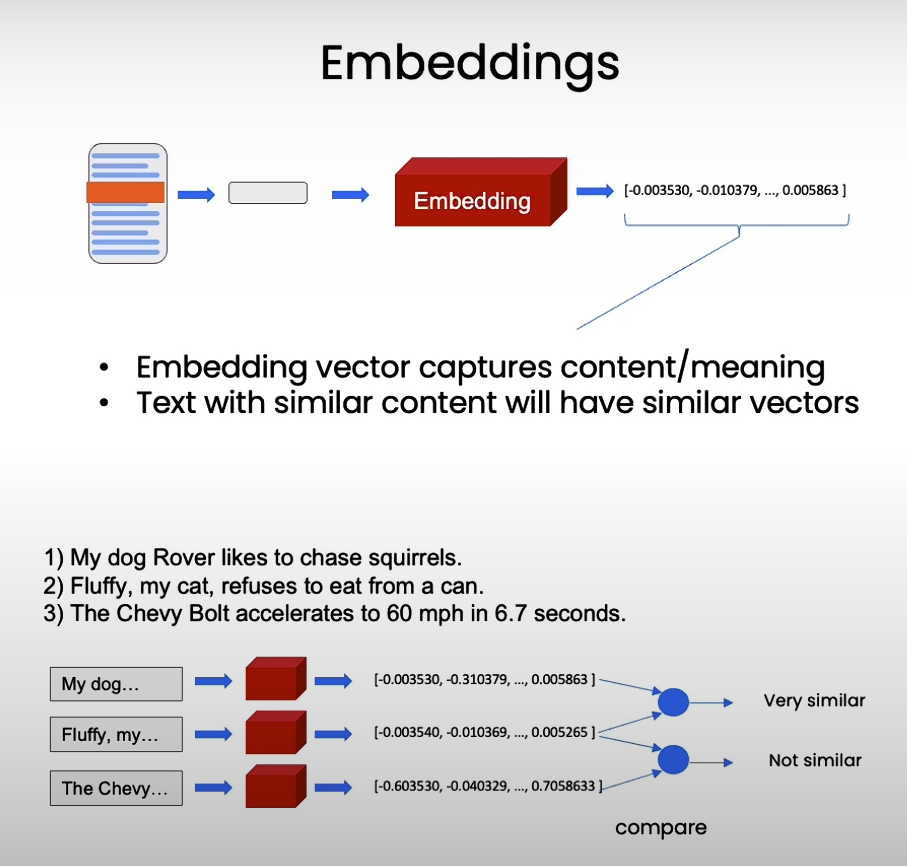

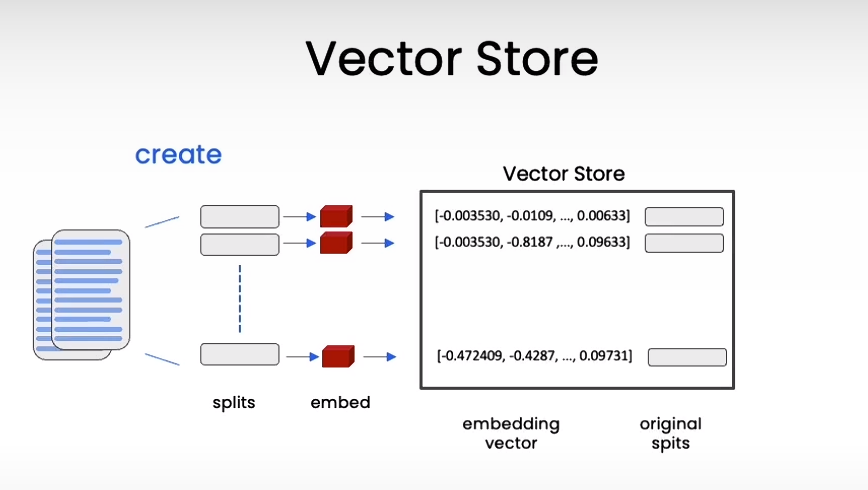

In [39]:
documents=[]
for path in paths:
  loader=PyPDFLoader(path)
  doc=loader.load()
  documents.extend(doc)

In [43]:
len(documents)

23

In [ ]:
documents

In [41]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 500,
    chunk_overlap = 150
)

In [42]:
splits = text_splitter.split_documents(documents)

In [ ]:
for i in splits:
   print(len(i.page_content))

In [102]:
len(splits)

103

## Embedding

In [51]:
import os
from google.colab import userdata
os.environ["COHERE_API_KEY"]=userdata.get('COHERE_API_KEY')

In [55]:
from langchain_cohere import CohereEmbeddings

embedding = CohereEmbeddings(model="embed-english-light-v3.0")

In [53]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [56]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [ ]:
embedding1

In [57]:
import numpy as np

In [59]:
print(np.dot(embedding1, embedding2))
print(np.dot(embedding1, embedding3))
print(np.dot(embedding2, embedding3))

0.8927225722256538
0.08367371654301467
0.05553564718698075


## Vector Stores

In [106]:
!pip install --quiet chromadb

In [107]:
from langchain.vectorstores import Chroma

In [111]:
persist_directory = 'chroma/'

In [109]:
!rm -rf ./docs/chroma

In [113]:
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embedding,
    persist_directory=persist_directory
)

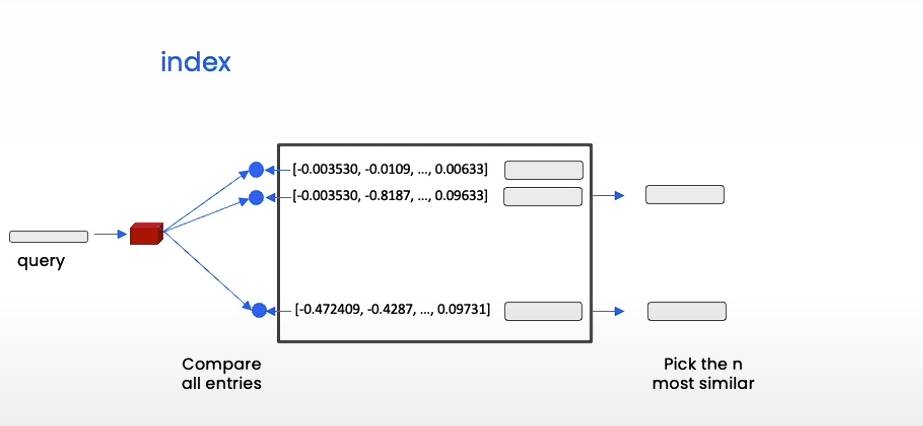

https://labelbox.com/blog/how-vector-similarity-search-works/

In [67]:
question = "what are Transformers"

In [68]:
docs = vectordb.similarity_search(question,k=3)

In [69]:
len(docs)

3

In [70]:
docs

[Document(page_content='transforms can be automatically applied to the document to allow it to be re -purposed. \nThese transforms are applied serially – one after the other – the translator will not write \nout multiple resultant files. This feature is available to all but you must create the XSLT \nas a TcEng ImanFile object before you can link it into the Transfermode.  \n \nDebugging Tricks.  \nBecause the traversal process can be complex, you may find yourself asking why did we', metadata={'page': 10, 'source': '/content/BestPractice.Transfermodes.pdf'}),
 Document(page_content='manipulating the data.  \n \nThe Transfermode  \nA Transfermode is an object that is responsible for translation intent.  But what this \nmeans in practice is you will probably create at least one Transfermode and potentially \none for each use case you encounter.  Realistically, you are probably going to have 2 – \none for import to your application and one to read your application data back into TcEng.  

In [71]:
vectordb.persist()

# Q&A

In [120]:
from langchain_cohere import ChatCohere
llm = ChatCohere(model="command", temperature=1)

In [115]:
vectordb = Chroma(persist_directory=persist_directory, embedding_function=embedding)

In [76]:
from langchain.chains import RetrievalQA

In [121]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever()
)

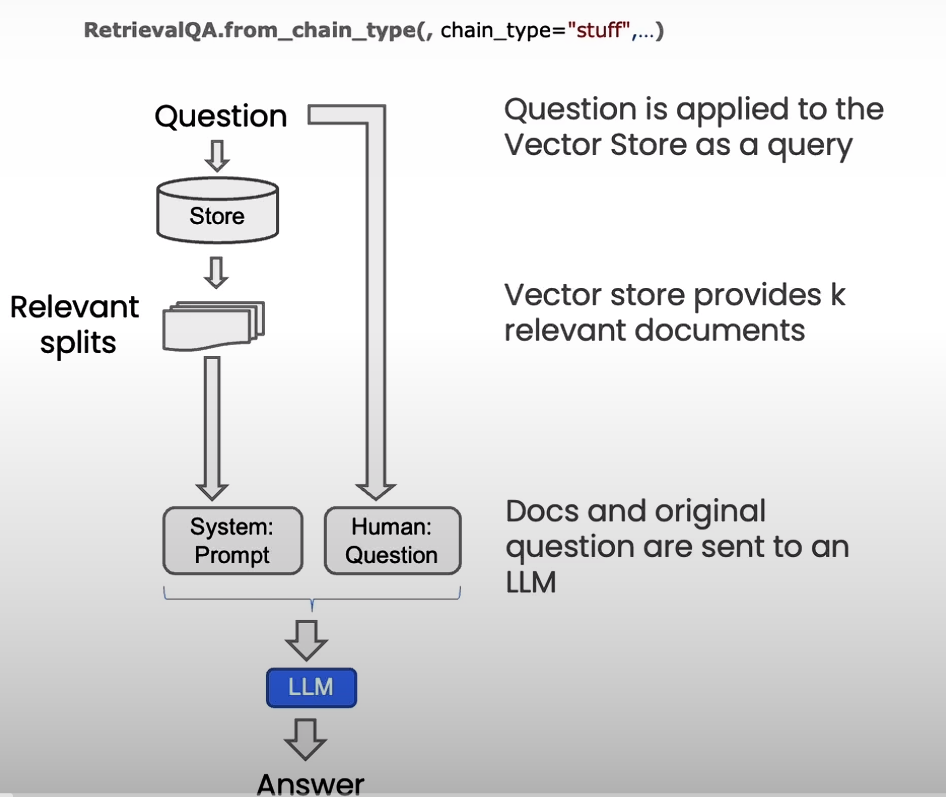

In [122]:
result = qa_chain({"query": question})

In [123]:
result

{'query': 'what are Transformers',
 'result': "Transformers are tools that can be used to modify the behavior of a Machine Learning model during the training and inference processes. They can be used to enhance the performance of the model, improve its interpretability, or adapt it to new contexts. \n\nDuring training, transformers can be used to enhance the model's ability to capture complex relationships and dependencies in the data, while during inference, they can be used to modify the model's responses or predictions according to specific requirements. They can also help in mitigating bias, enhancing computational efficiency, and improving the robustness of the model. \n\nTransformers are a powerful tool for the enhancement of Machine Learning models and are widely used in various applications. \n\nHowever, it is essential to note that Transformers require thoughtful and careful management of costs, capacity, and training data in order to be effective and not overburden a system."

Transformers are tools that can be used to transform, or change, data from one format to another. They can be used to convert data between different formats, different data types, and different levels of complexity. They can also be used to filter out data that is not needed, or to modify data to better suit a particular purpose. \n\nThe specific functionality of a Transformer will depend on the underlying framework or library being used. In the context of the information you've shared, it seems that Transformers are used to manipulate and repurpose documents by applying a series of transformations, although the specific details of how this works is unclear to me. \n\nMy inability to understand and fully interpret the provided context is a reminder of the limitations of large language models like myself. If you provide me with additional context or clearer details about the specific task or problem you're dealing with, I will be able to offer more tailored and precise explanations

In [80]:
qa_chain

RetrievalQA(combine_documents_chain=StuffDocumentsChain(llm_chain=LLMChain(prompt=ChatPromptTemplate(input_variables=['context', 'question'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], template="Use the following pieces of context to answer the user's question. \nIf you don't know the answer, just say that you don't know, don't try to make up an answer.\n----------------\n{context}")), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], template='{question}'))]), llm=ChatCohere(client=<cohere.client.Client object at 0x7dddd04f4e50>, async_client=<cohere.client.AsyncClient object at 0x7dddd04f6bf0>, model='command', temperature=0.75, cohere_api_key=SecretStr('**********'))), document_variable_name='context'), retriever=VectorStoreRetriever(tags=['Chroma', 'CohereEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x7dddc94047f0>))

prompt=ChatPromptTemplate(input_variables=['context', 'question'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], template="Use the following pieces of context to answer the user's question. \nIf you don't know the answer, just say that you don't know, don't try to make up an answer.\n----------------\n{context}")), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], template='{question}'))])

In [126]:
from langchain_core.prompts import ChatPromptTemplate,HumanMessagePromptTemplate,SystemMessagePromptTemplate,PromptTemplate
prompt=ChatPromptTemplate(input_variables=['context', 'question'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context'], template="Use the following pieces of context to answer the user's question. \nIf you don't know the answer, just say that you don't know, don't try to make up an answer.\n----------------\n{context}")), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], template='{question}'))])

In [127]:
prompt.invoke({"context":"abcdefdf","question":"12234"})

ChatPromptValue(messages=[SystemMessage(content="Use the following pieces of context to answer the user's question. \nIf you don't know the answer, just say that you don't know, don't try to make up an answer.\n----------------\nabcdefdf"), HumanMessage(content='12234')])

question -> 3 top documents -> prompt -> (system ,)-> question-> human->

## Prompt

In [128]:
from langchain.prompts import PromptTemplate

# Build prompt
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
Answer like a pirate
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


In [129]:

qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [130]:
qa_chain({"query": question})

{'query': 'what are Transformers',
 'result': 'Transformers are a useful tool that can automatically apply various transformations on a document so it can be repurposed. This helps users manipulate data and inspect it for various purposes. However, the transformers should be created as a TcEng ImanFile object before they can be linked into the Transfermode. \n\nThanks for asking!',
 'source_documents': [Document(page_content='transforms can be automatically applied to the document to allow it to be re -purposed. \nThese transforms are applied serially – one after the other – the translator will not write \nout multiple resultant files. This feature is available to all but you must create the XSLT \nas a TcEng ImanFile object before you can link it into the Transfermode.  \n \nDebugging Tricks.  \nBecause the traversal process can be complex, you may find yourself asking why did we', metadata={'page': 10, 'source': '/content/BestPractice.Transfermodes.pdf'}),
  Document(page_content='tr